In [1]:
import os
import sys
import json
import itertools
from scipy import signal
import numpy
import matplotlib.pyplot as pyplot

In [2]:
heatFluxDict = json.load(open("PoolBoiling-HeatFlux.json"))
heatFluxDict_05 = json.load(open("PoolBoiling-HeatFlux-0.5.json"))
heatFluxDict_02 = json.load(open("PoolBoiling-HeatFlux-0.2.json"))
heatFluxDict_01 = json.load(open("PoolBoiling-HeatFlux-0.1.json"))
heatFluxDict_005 = json.load(open("PoolBoiling-HeatFlux-0.05.json"))
heatFluxDict_002 = json.load(open("PoolBoiling-HeatFlux-0.02.json"))
heatFluxDict_001 = json.load(open("PoolBoiling-HeatFlux-0.01.json"))
heatFluxDict_0001 = json.load(open("PoolBoiling-HeatFlux-0.001.json"))

grav = [1,0.5,0.2,0.1,0.05,0.02,0.001]
hf = []

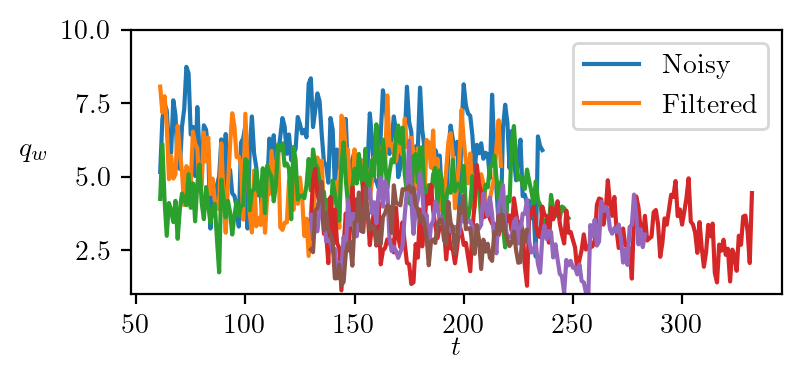

In [3]:
pyplot.rc("font", family="serif", size=10, weight="bold")
pyplot.rc("axes", labelweight="bold", titleweight="bold")
pyplot.rc("text", usetex=True)
figure =  pyplot.figure(figsize=(4,2), dpi=200)

start = 1
skip = 1
end = -1

start2 = 70

pyplot.plot(
    numpy.array(heatFluxDict["Buffer = 4.0"]["time"][start:end:skip]),
    numpy.array(heatFluxDict["Buffer = 4.0"]["qliq"][start:end:skip]),
    linestyle='-'
)
hf.append(numpy.mean(numpy.array(heatFluxDict["Buffer = 4.0"]["qliq"][start:end:skip])))

pyplot.plot(
    numpy.array(heatFluxDict_05["Buffer = 4.0"]["time"][start:end:skip]),
    numpy.array(heatFluxDict_05["Buffer = 4.0"]["qliq"][start:end:skip]),
    linestyle='-'
)
hf.append(numpy.mean(numpy.array(heatFluxDict_05["Buffer = 4.0"]["qliq"][start:end:skip])))

#pyplot.plot(
#    numpy.array(heatFluxDict_02["Buffer = 4.0"]["time"][start:end:skip]),
#    numpy.array(heatFluxDict_02["Buffer = 4.0"]["qliq"][start:end:skip]),
#    linestyle='-'
#)
hf.append(numpy.mean(numpy.array(heatFluxDict_02["Buffer = 4.0"]["qliq"][start:end:skip])))

pyplot.plot(
    numpy.array(heatFluxDict_01["Buffer = 4.0"]["time"][start:end:skip]),
    numpy.array(heatFluxDict_01["Buffer = 4.0"]["qliq"][start:end:skip]),
    linestyle='-'
)
hf.append(numpy.mean(numpy.array(heatFluxDict_01["Buffer = 4.0"]["qliq"][start:end:skip])))

pyplot.plot(
    numpy.array(heatFluxDict_005["Buffer = 4.0"]["time"][start2:end:skip]),
    numpy.array(heatFluxDict_005["Buffer = 4.0"]["qliq"][start2:end:skip]),
    linestyle='-'
)
hf.append(numpy.mean(numpy.array(heatFluxDict_005["Buffer = 4.0"]["qliq"][start2:end:skip])))

pyplot.plot(
    numpy.array(heatFluxDict_002["Buffer = 4.0"]["time"][start2:end:skip]),
    numpy.array(heatFluxDict_002["Buffer = 4.0"]["qliq"][start2:end:skip]),
    linestyle='-'
)
hf.append(numpy.mean(numpy.array(heatFluxDict_002["Buffer = 4.0"]["qliq"][start2:end:skip])))

#pyplot.plot(
#    numpy.array(heatFluxDict_001["Buffer = 4.0"]["time"][start:end:skip]),
#    numpy.array(heatFluxDict_001["Buffer = 4.0"]["qliq"][start:end:skip]),
#    linestyle='-'
#)
#hf.append(numpy.mean(numpy.array(heatFluxDict_001["Buffer = 4.0"]["qliq"][start:end:skip])))

pyplot.plot(
    numpy.array(heatFluxDict_0001["Buffer = 4.0"]["time"][start2:end:skip]),
    numpy.array(heatFluxDict_0001["Buffer = 4.0"]["qliq"][start2:end:skip]),
    linestyle='-'
)
hf.append(numpy.mean(numpy.array(heatFluxDict_0001["Buffer = 4.0"]["qliq"][start2:end:skip])))

pyplot.ylim([1,10])
pyplot.ylabel(r"${q}_w$", rotation=0, labelpad=10)
pyplot.xlabel(r"$t$", labelpad=-1)
pyplot.legend(["Noisy","Filtered"])
pyplot.tight_layout()
pyplot.savefig("/Users/Akash/Desktop/hf.png")

In [4]:
hf = numpy.array(hf)
grav = numpy.array(grav)
hf = hf/hf[0]
hf[0]

hf=hf[::-1]
grav=grav[::-1]

In [5]:
import math

Bo = 1*(10**2)
atrans = 4.41/(Bo)

m_bdb = (math.log(hf[-3],grav[-3]) + math.log(hf[-4],grav[-4]))/2
m_sdb = 0

grav_ref = numpy.linspace(0.0001,1.,100)
hf_ref = numpy.zeros_like(grav_ref)

ind1 = numpy.where(grav_ref>=atrans)
ind2 = numpy.where(grav_ref<atrans)

hf_ref[ind1] = grav_ref[ind1]**m_bdb

K_jump = 0.76#0.558/hf_ref[ind1][0]
hf_ref[ind2] = K_jump*hf_ref[ind1][0]
print(m_bdb,K_jump)

0.11348885967467494 0.76


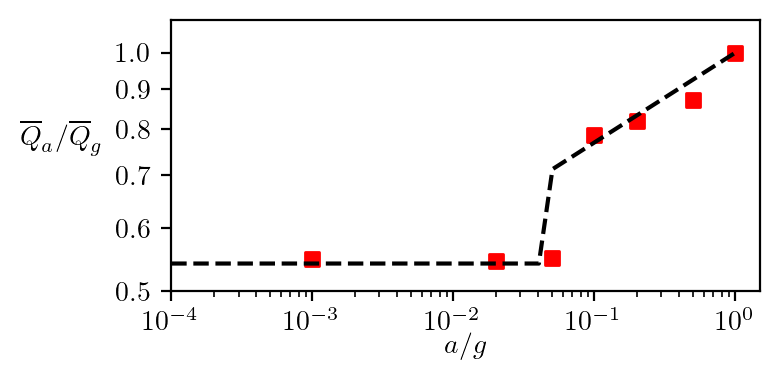

In [18]:
import matplotlib.ticker as mticker
pyplot.rc("font", family="serif", size=10, weight="bold")
pyplot.rc("axes", labelweight="bold", titleweight="bold")
pyplot.rc("text", usetex=True)
figure =  pyplot.figure(figsize=(4,2), dpi=200)
pyplot.plot(grav_ref,hf_ref,linestyle='--',color='k')
pyplot.scatter(grav,hf,s=23,marker='s',color='r')
pyplot.xscale('log')
pyplot.yscale('log')
pyplot.xticks([0.0001,0.001,0.01,0.1,1.0])
pyplot.ylim([0.5,1.1])
pyplot.xlim([0.0001,1.5])

ax=pyplot.gca()
ax.yaxis.set_major_formatter(mticker.ScalarFormatter())
ax.set_yticks([0.5,0.6,0.7,0.8,0.9,1.0])
pyplot.ylabel(r"$\overline{Q}_a/\overline{Q}_g$", rotation=0, labelpad=20)
pyplot.xlabel(r"$a/g$", labelpad=-1)
#ax.yaxis.get_major_formatter().set_scientific(False)
#ax.yaxis.get_major_formatter().set_useOffset(False)
#ax.yaxis.set_minor_formatter(mticker.ScalarFormatter())
pyplot.tight_layout()
pyplot.savefig("/Users/Akash/Desktop/grav.png")